# Aerosols in NorESM

### Overview over aerosol species in NorESM 

The table below is from Kirkevåg et al 2018 (https://doi.org/10.5194/gmd-11-3945-2018) which you can check for more details :) 


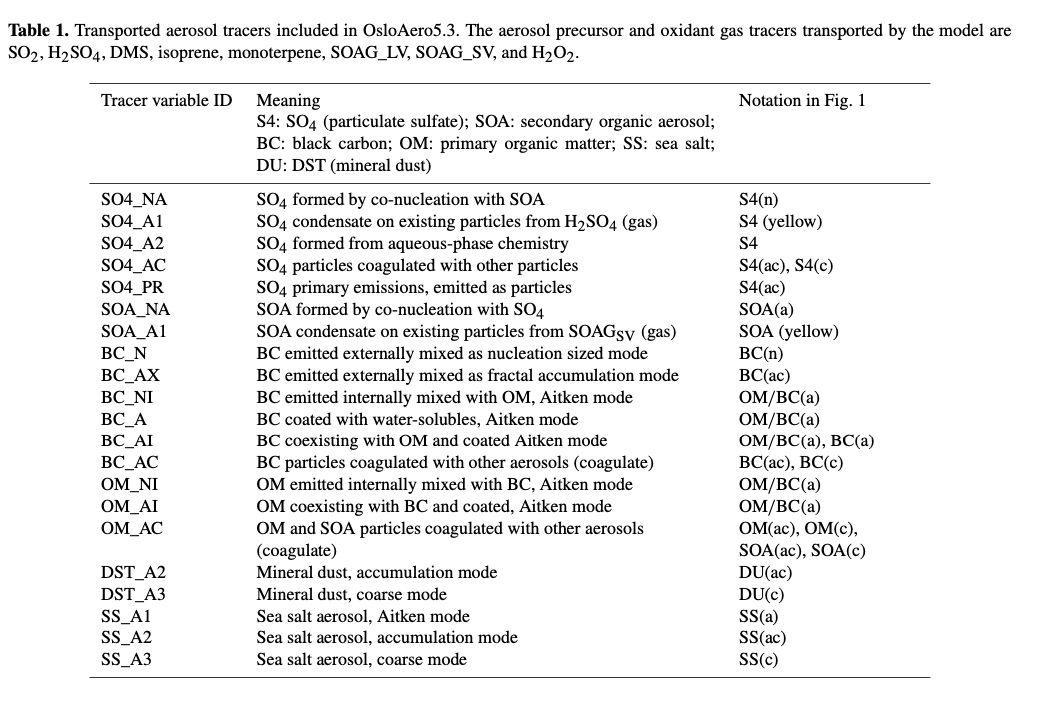

# Notebook example on how to read-only with xarray files on the metno s3 store

key, secret key and endpoint can also be used to browse the store in jupyterlab bucket explorer

In [1]:
import s3fs
import xarray as xr
import s3fs
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", 
                       client_kwargs=dict(endpoint_url="https://rgw.met.no"))
s3.ls('escience2022')

['escience2022/Ada',
 'escience2022/Antoine',
 'escience2022/Dominic',
 'escience2022/ESA_SMOS_sss',
 'escience2022/Remy',
 'escience2022/Sara',
 'escience2022/Zhihong']

## Data for stations is in two folders: 

2012-2015 is in: 
```python 
'escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full'
```
and 2015-2018 in:
```python 
'escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245'
```


## Example: check files in OsloAero_intBVOC_f09_f09_mg17_full

In [2]:
s3.ls('escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full')

['escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/ABSVIS_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc',
 'escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/ACTNI_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc',
 'escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/ACTNL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc',
 'escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/ACTREI_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc',
 'escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc',
 'escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/AEROD_v_OsloAero_intBVOC_f09_f

## To ease imports, you can pick out the files you want to look at and find the files like this: 

In [3]:
varl = ['N100','N200','N50', 'BC_AI'] 

In [4]:
path_to_data = 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/'
postfix = '_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc'

In [5]:
def make_file_path_for_var(v,):
    return path_to_data+v+postfix

In [6]:
filelist = [make_file_path_for_var(v) for v in varl]

In [7]:
filelist

['s3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/N200_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/N50_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/BC_AI_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc']

In [8]:
list_of_s3_obj = [s3.open(s) for s in filelist]

ds = xr.open_mfdataset(list_of_s3_obj)

ds

<xarray.Dataset>
Dimensions:   (lev: 32, time: 26281, location: 5)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time      (time) datetime64[ns] 2012-01-02 ... 2015-01-01
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
Data variables:
    BC_AI     (location, time, lev) float32 dask.array<chunksize=(5, 26281, 32), meta=np.ndarray>
    N100      (location, time, lev) float64 dask.array<chunksize=(5, 26281, 32), meta=np.ndarray>
    N200      (location, time, lev) float64 dask.array<chunksize=(5, 26281, 32), meta=np.ndarray>
    N50       (location, time, lev) float64 dask.array<chunksize=(5, 26281, 32), meta=np.ndarray>

In [9]:
ds.sel(location='Zeppelin')

<xarray.Dataset>
Dimensions:   (lev: 32, time: 26281)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time      (time) datetime64[ns] 2012-01-02 ... 2015-01-01
    location  <U8 'Zeppelin'
Data variables:
    BC_AI     (time, lev) float32 dask.array<chunksize=(26281, 32), meta=np.ndarray>
    N100      (time, lev) float64 dask.array<chunksize=(26281, 32), meta=np.ndarray>
    N200      (time, lev) float64 dask.array<chunksize=(26281, 32), meta=np.ndarray>
    N50       (time, lev) float64 dask.array<chunksize=(26281, 32), meta=np.ndarray>

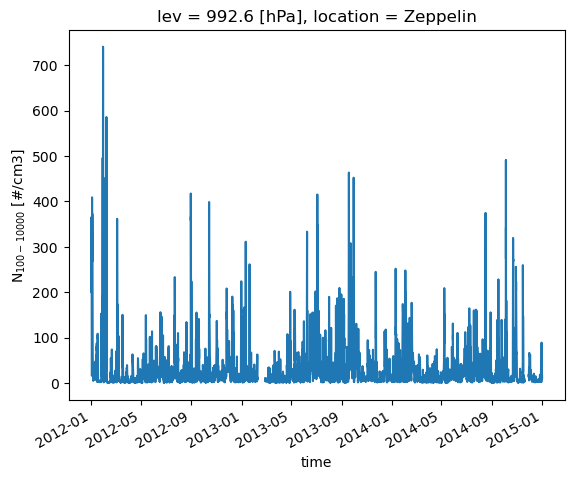

In [10]:
ds.isel(lev=-1).sel(location='Zeppelin')['N100'].plot()

### Aerosol mass for aerosol: 

Let's try to get the total sulphate aerosol 

Consult the table below. We want everything with SO4 in it. 

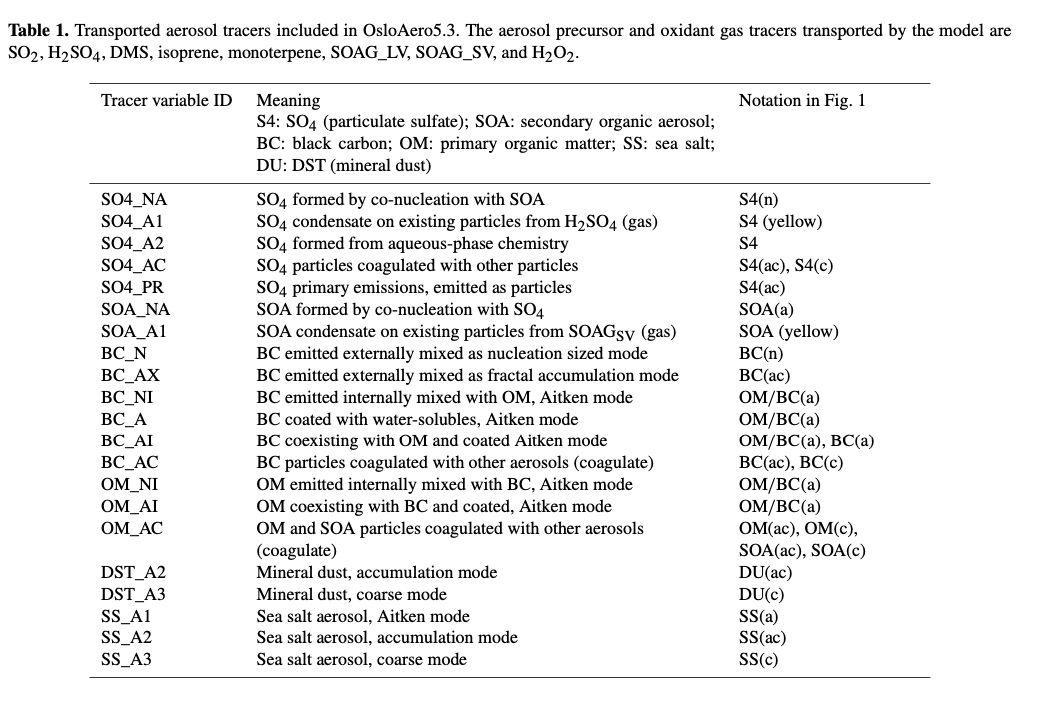

In [11]:
sulphate_varl = ['SO4_NA', 'SO4_A1', 'SO4_A2', 'SO4_AC','SO4_PR'] 

In [12]:
path_to_data = 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/'
postfix = '_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc'

In [13]:
def make_file_path_for_var(v,):
    return path_to_data+v+postfix

In [14]:
filelist = [make_file_path_for_var(v) for v in sulphate_varl]

In [15]:
filelist

['s3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/SO4_NA_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/SO4_A1_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/SO4_A2_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/SO4_AC_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc',
 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/SO4_PR_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc']

In [16]:
list_of_s3_obj = [s3.open(s) for s in filelist]

ds = xr.open_mfdataset(list_of_s3_obj)

ds

<xarray.Dataset>
Dimensions:   (lev: 32, time: 26352, location: 5)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time      (time) datetime64[ns] 2015-01-01 ... 2018-01-02T23:00:00
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
Data variables:
    SO4_A1    (location, time, lev) float32 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>
    SO4_A2    (location, time, lev) float32 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>
    SO4_AC    (location, time, lev) float32 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>
    SO4_NA    (location, time, lev) float32 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>
    SO4_PR    (location, time, lev) float32 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>

## Example: Calculate total sulphate

In [17]:
ds['SO4_tot'] = 0
for var in sulphate_varl:
    ds['SO4_tot'] = ds['SO4_tot'] + ds[var]

ds['SO4_tot'].attrs['units'] = ds[var].attrs['units']

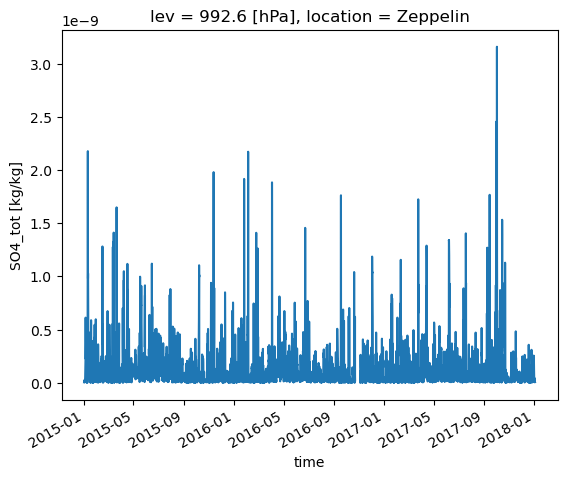

In [18]:
ds.isel(lev=-1).sel(location='Zeppelin')['SO4_tot'].plot()

## Need to convert to mass? 

For now let's assume standard pressure and temperature.

Ideal gas law gives us: 

$$ p = \rho R T$$

$$ \rho = p/ (R T)$$

In [19]:
T_standard =  273.15 #K
p_standard = 1e5 #Pa
R = 287.058


In [20]:
rho = p_standard/(R*T_standard)
rho

1.2753492774515685

## Change unit of SO4_tot

In [21]:
ds['SO4_tot']

<xarray.DataArray 'SO4_tot' (location: 5, time: 26352, lev: 32)>
dask.array<add, shape=(5, 26352, 32), dtype=float64, chunksize=(5, 26352, 32), chunktype=numpy.ndarray>
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time      (time) datetime64[ns] 2015-01-01 ... 2018-01-02T23:00:00
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
Attributes:
    units:    kg/kg

In [22]:
var = 'SO4_tot'
if ds[var].attrs['units'] =='kg/kg':
    ds[var] = ds[var]*rho
    ds[var].attrs['units'] = 'kg/m3'
    ## Change to ug/m3
    ds[var] = ds[var]*1e9
    ds[var].attrs['units'] = 'ug/m3'
                

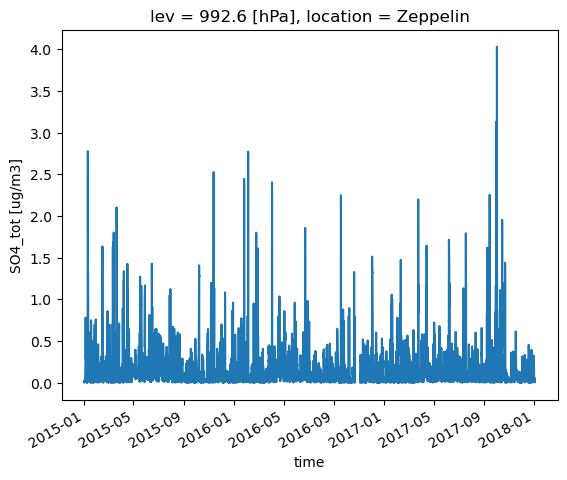

In [23]:
ds['SO4_tot'].sel(location='Zeppelin').isel(lev=-1).plot()

In [24]:
filelist = [make_file_path_for_var(v) for v in varl]

In [25]:
list_of_s3_obj = [s3.open(s) for s in filelist]

ds_aero = xr.open_mfdataset(list_of_s3_obj)

ds_aero

<xarray.Dataset>
Dimensions:   (lev: 32, time: 26352, location: 5)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time      (time) datetime64[ns] 2015-01-01 ... 2018-01-02T23:00:00
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
Data variables:
    BC_AI     (location, time, lev) float32 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>
    N100      (location, time, lev) float64 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>
    N200      (location, time, lev) float64 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>
    N50       (location, time, lev) float64 dask.array<chunksize=(5, 26352, 32), meta=np.ndarray>

In [26]:
import matplotlib.pyplot as plt

In [27]:
ds =xr.merge([ds,ds_aero])

In [28]:
ds['season']= ds['time.season']

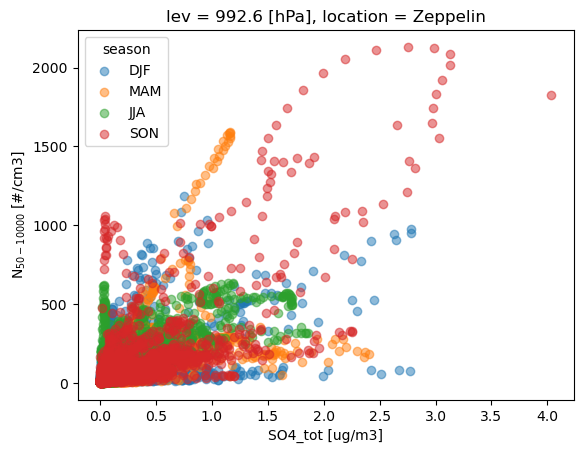

In [29]:
ds.sel(location='Zeppelin').isel(lev=-1).plot.scatter(x='SO4_tot', y='N50', hue='season', alpha=.5)

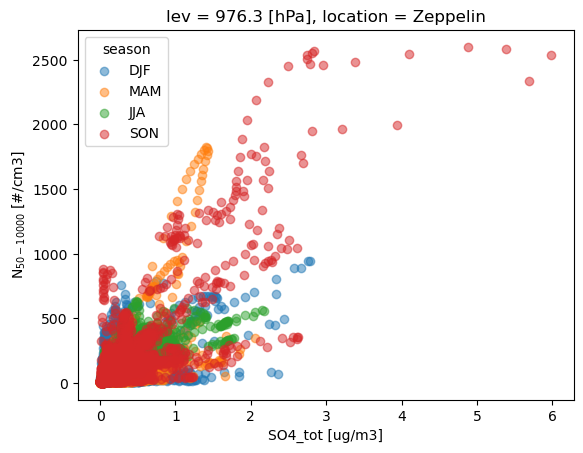

In [30]:
ds.sel(location='Zeppelin').isel(lev=-2).plot.scatter(x='SO4_tot', y='N50', hue='season', alpha=.5)

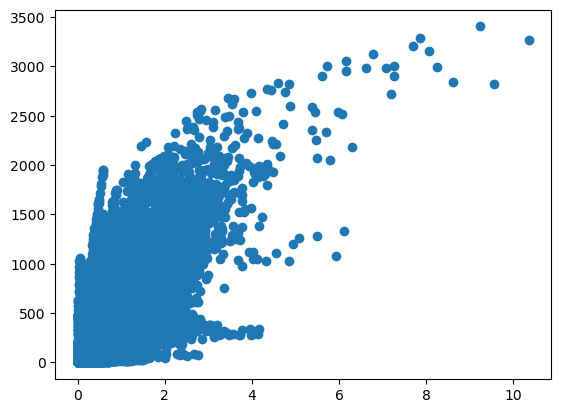

In [31]:
plt.scatter(x = ds['SO4_tot'].sel(location='Zeppelin'), y = ds_aero['N50'].sel(location='Zeppelin'))

In [32]:
ds_season = ds.groupby('time.season').mean()
ds_season.compute()

<xarray.Dataset>
Dimensions:   (location: 5, season: 4, lev: 32)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
  * season    (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    SO4_A1    (location, season, lev) float32 4.407e-13 6.037e-13 ... 3.663e-10
    SO4_A2    (location, season, lev) float32 2.635e-17 4.958e-17 ... 5.053e-10
    SO4_AC    (location, season, lev) float32 3.098e-16 6.367e-16 ... 8.99e-12
    SO4_NA    (location, season, lev) float32 6.087e-13 5.992e-13 ... 4.856e-11
    SO4_PR    (location, season, lev) float32 1.619e-14 2.439e-14 ... 5.326e-11
    SO4_tot   (location, season, lev) float64 0.00136 0.001566 ... 1.291 1.266
    BC_AI     (location, season, lev) float32 6.377e-17 1.434e-16 ... 1.563e-11
    N100      (location, season, lev) float64 0.004283 0.01175 ... 315.2 399.8
    N200      (location, season, lev) float64 0.0001161 0.0002785 ... 47.24 61.5
    N50       (location, season, lev) float64 0.04261 0.1088 ... 1.38e+03

In [33]:
ds_aero_season = ds_aero.groupby('time.season').mean(keep_attrs=True)
ds_aero_season

# I am grouping by season when I actually want to just be applying a label 
#by which I can sort the data. Otherwise I am just removing all of my data.

<xarray.Dataset>
Dimensions:   (location: 5, season: 4, lev: 32)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
  * season    (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    BC_AI     (location, season, lev) float32 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    N100      (location, season, lev) float64 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    N200      (location, season, lev) float64 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    N50       (location, season, lev) float64 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>

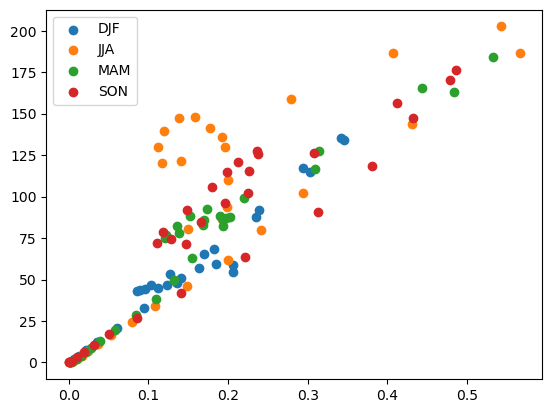

In [34]:
for seas,seas in zip (ds_season.season,ds_aero_season.season):
    plt.scatter(x = ds_season['SO4_tot'].sel(season=seas,location = 'Zeppelin'), y = ds_aero_season['N50'].sel(season=seas,location = 'Zeppelin'),
    label=seas.values)
plt.legend()

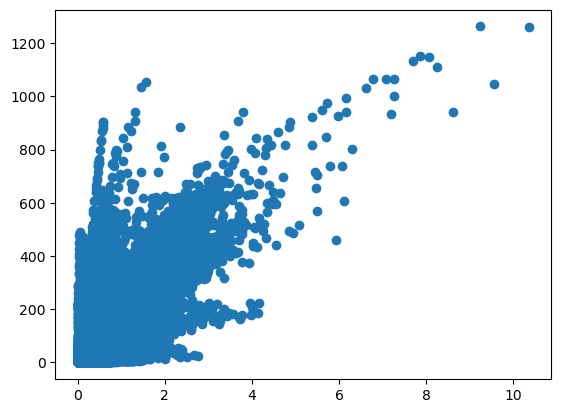

In [35]:
plt.scatter(x = ds['SO4_tot'].sel(location='Zeppelin'), y = ds_aero['N100'].sel(location='Zeppelin'))

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylabel'

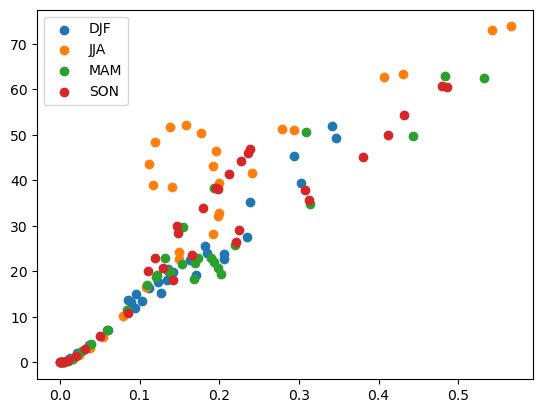

In [36]:
for seas,seas in zip (ds_season.season,ds_aero_season.season):
    plt.scatter(x = ds_season['SO4_tot'].sel(season=seas,location = 'Zeppelin'), 
                y = ds_aero_season['N100'].sel(season=seas,location = 'Zeppelin'),
                label=seas.values)
                
plt.legend()

plt.set_ylabel ("N$_100$")
plt.set_xlabel ("SO$_4$ Concentration (ug/m$^3$)")

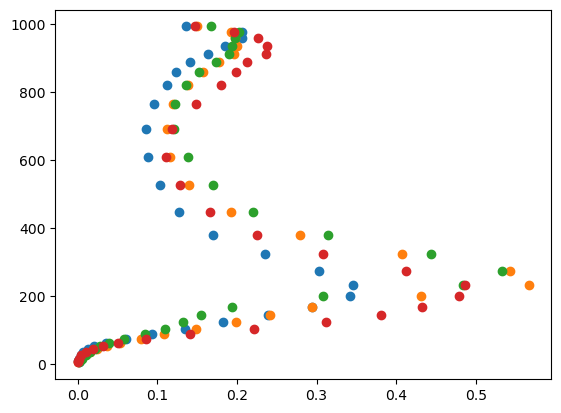

In [37]:
for seas in ds_season.season:
    plt.scatter(x = ds_season['SO4_tot'].sel(season=seas,location = 'Zeppelin'), 
                y = ds_season['lev'],
                label=seas.values)

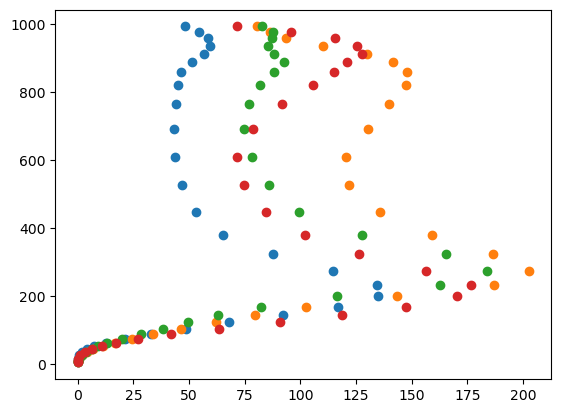

In [38]:
for seas in ds_aero_season.season:
    plt.scatter(x = ds_aero_season['N50'].sel(season=seas,location = 'Zeppelin'), 
                y = ds_aero_season['lev'],
                label=seas.values)

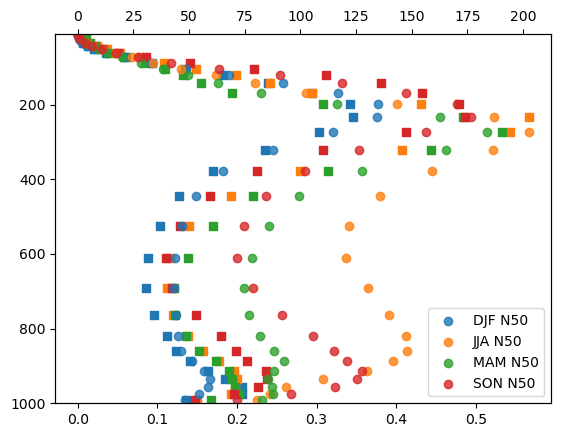

In [39]:
fig, ax1 = plt.subplots()

for seas in ds_season.season:
    ax1.scatter(x = ds_season['SO4_tot'].sel(season=seas,location = 'Zeppelin'), 
                y = ds_season['lev'],
                marker = 's',
                label=f'{seas.values} SO4')
ax1.set_ylim(ax1.get_ylim()[::-1])
#ax1.gca.invert_yaxis()
ax2 = ax1.twiny() 
for seas in ds_aero_season.season:
    ax2.scatter(x = ds_aero_season['N50'].sel(season=seas,location = 'Zeppelin'), 
                y = ds_aero_season['lev'],
                label=f'{seas.values} N50', alpha = 0.8)
ax2.set_ylim(ax2.get_ylim()[::-1])
#ax2.gca.invert_yaxis()
ax1.set_ylim([1000,10])
plt.legend()

In [40]:
percentage_SO4 = (ds_season['SO4_tot']/ds_season['SO4_tot'].max())
percentage_SO4

<xarray.DataArray 'SO4_tot' (location: 5, season: 4, lev: 32)>
dask.array<truediv, shape=(5, 4, 32), dtype=float64, chunksize=(5, 1, 32), chunktype=numpy.ndarray>
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
  * season    (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [41]:
percentage_N50 = (ds_aero_season['N50']/ds_aero_season['N50'].max())
percentage_N50.compute()

<xarray.DataArray 'N50' (location: 5, season: 4, lev: 32)>
array([[[7.66786145e-06, 1.95772872e-05, 1.02271432e-04, 4.08347370e-04,
         9.18379722e-04, 1.52456374e-03, 2.33770091e-03, 3.51044404e-03,
         5.30021974e-03, 7.69358066e-03, 1.02086215e-02, 1.31211186e-02,
         1.64408019e-02, 2.00083423e-02, 2.27311973e-02, 2.27023247e-02,
         1.93716919e-02, 1.50253078e-02, 1.15289211e-02, 9.83643923e-03,
         9.33030099e-03, 9.23009907e-03, 9.43648113e-03, 1.03601364e-02,
         1.28612686e-02, 1.76464175e-02, 2.34675071e-02, 2.92375414e-02,
         3.42821962e-02, 4.23657987e-02, 5.11195113e-02, 6.03317759e-02],
        [4.41486408e-07, 8.94058620e-06, 8.21967185e-05, 3.42218353e-04,
         8.18671984e-04, 1.47340480e-03, 2.31922174e-03, 3.48643497e-03,
         5.13003107e-03, 7.06146957e-03, 9.33749767e-03, 1.25061447e-02,
         1.63186425e-02, 2.14599934e-02, 2.94049785e-02, 3.68002810e-02,
         3.84198996e-02, 3.62384256e-02, 3.33851845e-02, 3.22209665e-02,
         3.36540471e-02, 3.98530253e-02, 5.54507108e-02, 8.89712167e-02,
         1.31717779e-01, 1.64671928e-01, 1.87958878e-01, 2.05996610e-01,
         2.21109218e-01, 2.36373493e-01, 2.53336378e-01, 2.69863393e-01],
        [6.02069068e-06, 2.93158583e-05, 1.28192702e-04, 4.03128186e-04,
         8.27502724e-04, 1.33534217e-03, 2.10959638e-03, 3.24478702e-03,
         4.80312392e-03, 6.50118600e-03, 8.19704563e-03, 1.00804799e-02,
         1.25005126e-02, 1.72159787e-02, 2.51929169e-02, 3.22141397e-02,
...
         3.81852152e-02, 3.99906561e-02, 4.19805246e-02, 4.35324596e-02,
         4.75624329e-02, 6.09342502e-02, 9.46564542e-02, 1.53161992e-01,
         2.08222176e-01, 2.46375317e-01, 2.73982030e-01, 2.97566631e-01,
         3.18368283e-01, 3.42562370e-01, 3.69618082e-01, 4.02943382e-01],
        [6.75867821e-06, 3.11404459e-05, 1.46122641e-04, 5.09624458e-04,
         1.11046508e-03, 1.88029851e-03, 2.87037606e-03, 4.22487036e-03,
         5.80062375e-03, 7.42534484e-03, 9.02796873e-03, 1.08435087e-02,
         1.42819978e-02, 2.16555950e-02, 2.89669680e-02, 3.26656580e-02,
         3.35114699e-02, 3.36308956e-02, 3.44118037e-02, 3.53238948e-02,
         3.66303371e-02, 4.03049110e-02, 5.08505768e-02, 7.28165131e-02,
         1.00352489e-01, 1.24847796e-01, 1.45791587e-01, 1.64199071e-01,
         1.82418616e-01, 2.01836104e-01, 2.19215179e-01, 2.49033678e-01],
        [3.34292074e-06, 2.47629758e-05, 1.54719363e-04, 4.57967766e-04,
         1.01662104e-03, 1.76382768e-03, 2.80485253e-03, 4.29500193e-03,
         6.79679161e-03, 1.07697099e-02, 1.52688547e-02, 1.94194490e-02,
         2.27674856e-02, 2.48348495e-02, 2.56801053e-02, 2.60808276e-02,
         2.59567296e-02, 2.54447977e-02, 2.54501940e-02, 2.63195096e-02,
         2.80386637e-02, 3.07566360e-02, 3.78684478e-02, 5.86310149e-02,
         8.65971339e-02, 1.12097536e-01, 1.33438234e-01, 1.53762551e-01,
         1.72700681e-01, 1.92198931e-01, 2.11664557e-01, 2.48246378e-01]]])
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
  * season    (season) object 'DJF' 'JJA' 'MAM' 'SON'

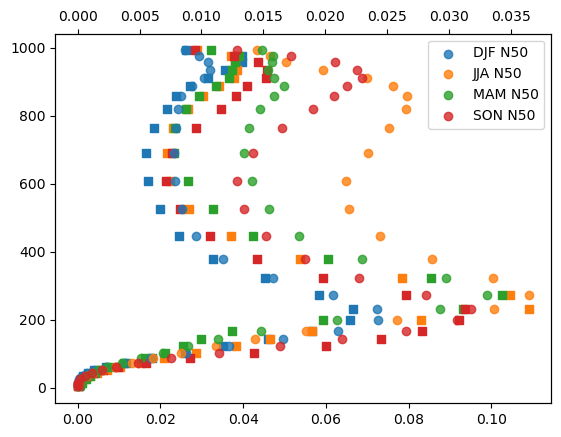

In [42]:
fig, ax1 = plt.subplots()

for seas in percentage_SO4.season:
    ax1.scatter(x = percentage_SO4.sel(season=seas,location = 'Zeppelin'), 
                y = percentage_SO4['lev'],
                marker = 's',
                label=f'{seas.values} SO4')
ax1.set_ylim(ax1.get_ylim()[::-1])
#ax1.gca.invert_yaxis()
ax2 = ax1.twiny() 
for seas in percentage_N50.season:
    ax2.scatter(x = percentage_N50.sel(season=seas,location = 'Zeppelin'), 
                y = percentage_N50['lev'],
                label=f'{seas.values} N50', alpha = 0.8)
#ax2.set_ylim(ax2.get_ylim()[::-1])
#ax2.gca.invert_yaxis()
plt.legend()

In [43]:
factor = percentage_SO4 / percentage_N50
factor

<xarray.DataArray (location: 5, season: 4, lev: 32)>
dask.array<truediv, shape=(5, 4, 32), dtype=float64, chunksize=(5, 1, 32), chunktype=numpy.ndarray>
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
  * season    (season) object 'DJF' 'JJA' 'MAM' 'SON'

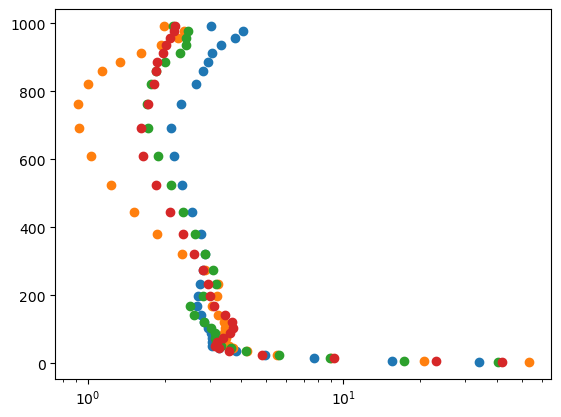

In [44]:
fig, ax = plt.subplots()
for seas in factor.season:
    ax.scatter(x= factor.sel(season=seas,location = 'Zeppelin'),
               y= factor['lev'],
              label=seas.values)
ax.set_xscale('log')
